In [1]:
%matplotlib inline
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score

df = pd.read_csv('spotify_unique_ver4.csv')
df.head()


,song_name,artist_name,release_date,popularity,genres,artist_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,我們的基因,Kay Tse,2019-11-06,51,c-pop,57,0.701,0.635,279547.0,0.445,0.000000,1,0.1810,-8.185,0,0.0333,131.399,0.436
1,忘記和記,Juno Mak,2019-10-22,50,c-pop,55,0.650,0.678,157156.0,0.498,0.000000,6,0.0602,-13.582,0,0.0407,140.053,0.406
2,Two at a time,AGA,2019-10-30,53,c-pop,54,0.686,0.763,261639.0,0.561,0.000003,8,0.1110,-6.806,1,0.0290,89.251,0.372
3,"讓愛高飛 - 劇集 ""多功能老婆"" 片尾曲",Pakho Chau,2019-10-14,51,c-pop,55,0.710,0.485,220286.0,0.377,0.000000,10,0.1190,-9.091,1,0.0300,139.976,0.355
4,爸爸的禮物,Jason Chan,2019-11-15,38,c-pop,54,0.695,0.582,272909.0,0.413,0.000000,2,0.2430,-8.034,0,0.0240,82.984,0.214


In [46]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

df['tempo'] = MinMaxScaler().fit_transform(df['tempo'].values.reshape(-1,1))
df['tempo'].head()

df['loudness'] = MinMaxScaler().fit_transform(df['loudness'].values.reshape(-1,1))
df['loudness'].head()

df['key'] = MinMaxScaler().fit_transform(df['key'].values.reshape(-1,1))
df['key'].head()



0    0.081541
1    0.447888
2    0.562035
3    0.702359
4    0.185823
Name: key, dtype: float64

,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,key
loudness,True,True,True,True,True,False,False,True,True,False
acousticness,True,True,True,True,True,False,False,False,True,False
danceability,True,True,True,True,True,False,False,False,True,False
energy,True,True,True,True,True,False,False,True,True,False
instrumentalness,True,True,True,True,True,False,False,True,True,False
liveness,False,False,False,False,False,True,False,False,False,False
speechiness,False,False,False,False,False,False,True,False,False,False
tempo,True,False,False,True,True,False,False,True,False,False
valence,True,True,True,True,True,False,False,False,True,False
key,False,False,False,False,False,False,False,False,False,True


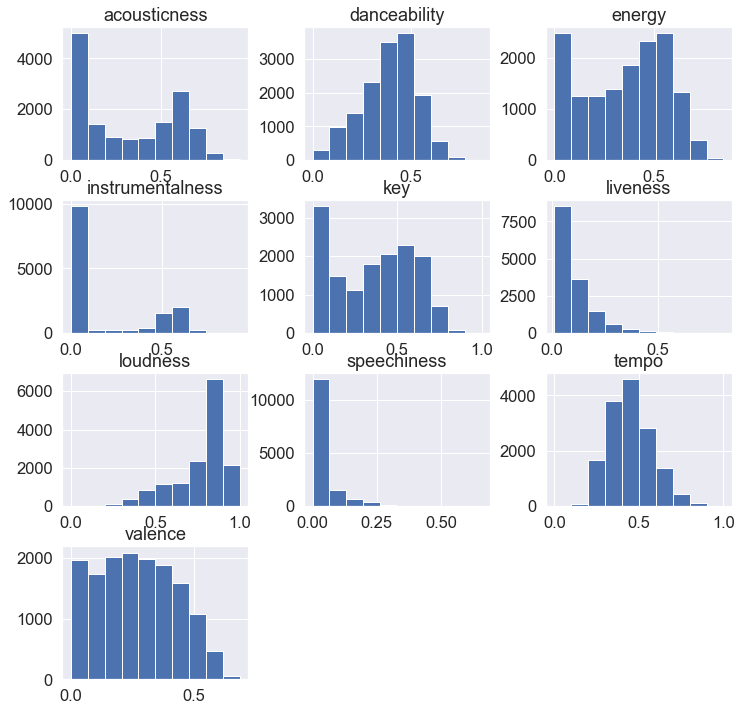

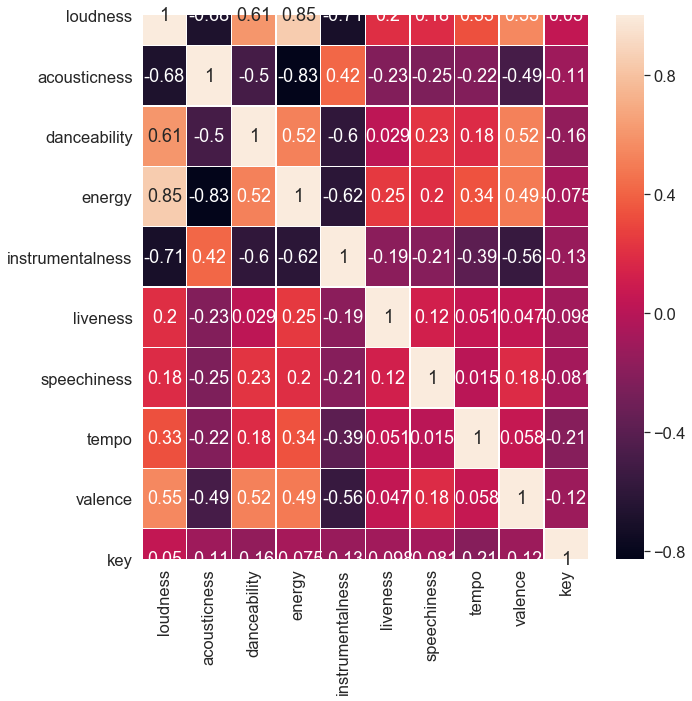

In [47]:
audio_cols = ['loudness','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'key']
audio_features = df[audio_cols]
audio_features.hist(figsize=(12,12))
plt.figure(figsize=(10,10))
corr = audio_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)
abs(corr) > 0.3

In [4]:
genre_count = df.groupby('genres').agg({'genres':'count'})['genres']
major_genres = genre_count[genre_count > 300].index.values
minor_genres = genre_count[genre_count <= 300].index.values
print(genre_count)
print("Major genres: {} \nMinor Genres: {}".format(major_genres, minor_genres))

genres
21st century classical    9
432hz                     5
a cappella                8
aarhus indie              1
abstract                  1
                         ..
vocal trance              2
water                     9
wyoming indie             1
yoga                      1
zen                       1
Name: genres, Length: 846, dtype: int64
Major genres: ['anime' 'background music' 'big room' 'c-pop' 'classical' 'dance pop'
 'k-pop' 'mandopop' 'none'] 
Minor Genres: ['21st century classical' '432hz' 'a cappella' 'aarhus indie' 'abstract'
 'abstract beats' 'abstract hip hop' 'abstract idm' 'acid house'
 'acid jazz' 'acid techno' 'acousmatic' 'acoustic chill' 'acoustic pop'
 'acoustic punk' 'adult standards' 'afghan pop' 'afro dancehall'
 'afro house' 'afrobeat' 'afropop' 'alabama indie' 'alabama rap'
 'alaska indie' 'albanian pop' 'alberta hip hop' 'album rock' 'alt-idol'
 'alternative americana' 'alternative country' 'alternative dance'
 'alternative emo' 'alternative hip h

In [48]:
norm = Normalizer()
df[audio_cols] = norm.fit_transform(df[audio_cols])
audio_features = df[audio_cols]
audio_features
# df['genres'].value_counts().head(20)

,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,key
0,0.611437,0.408128,0.369702,0.259083,0.000000,0.105380,0.019388,0.419762,0.253843,0.060462
1,0.551405,0.359188,0.374661,0.275193,0.000000,0.033266,0.022491,0.424652,0.224354,0.344322
2,0.626968,0.341496,0.379827,0.279270,0.000001,0.055257,0.014436,0.243785,0.185184,0.413577
3,0.588035,0.350082,0.239140,0.185888,0.000000,0.058676,0.014792,0.378701,0.175041,0.512054
4,0.623107,0.468155,0.392038,0.278199,0.000000,0.163686,0.016167,0.306712,0.144151,0.139907
...,...,...,...,...,...,...,...,...,...,...
14855,0.615852,0.004566,0.420805,0.368138,0.000000,0.069520,0.107440,0.413179,0.330219,0.109388
14856,0.626676,0.180998,0.300842,0.357558,0.000000,0.075950,0.073977,0.395528,0.143516,0.409735
14857,0.664088,0.156012,0.262870,0.372934,0.000000,0.052841,0.098309,0.277303,0.400183,0.277428
14858,0.652451,0.006307,0.445940,0.420490,0.000017,0.069713,0.025727,0.309546,0.306515,0.057457


In [44]:
# clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
#                         connectivity=None, distance_threshold=None,
#                         linkage='ward', memory=None, n_clusters = 10,
#                         pooling_func='deprecated').fit(audio_features)

In [85]:
# import seaborn as sns

# def plot_correation(df, audio_cols):
#     plt.figure(figsize=(16,16))
#     sns.set(font_scale=1.5)
#     sns.heatmap(
#         data=df[audio_cols],
#         cmap='Purples',
#         annot=True
#     )
#     plt.ylabel("Hierarchical")
    
# tmp = df.copy()
# tmp['labels'] = clustering.labels_
# tmp = tmp.groupby('labels').agg('mean')
# plot_correation(tmp, audio_cols)


In [28]:
major_genres = ['background music', 'big room', 'c-pop', 'classical', 'dance pop',
 'k-pop', 'mandopop', 'none', 'anime'] 

In [29]:
def plot_correation(df, audio_cols):
    plt.figure(figsize=(16,16))
    sns.set(font_scale=1.5)
    sns.heatmap(
        data=df[audio_cols],
        cmap='Purples',
        annot=True
    )
    plt.ylabel("Hierarchical")
    
tmp1 = df.copy()
tmp_list = []
for i in range(len(major_genres)):
    _tmp = tmp1[tmp1['genres'] == major_genres[i]].groupby('genres').agg('mean')
    tmp_list.append(_tmp)


genres = pd.concat(tmp_list)

# # tmp = tmp.iloc[tmp.genres == 'acousticness', :]
# # tmp = tmp[tmp['genres'] in major_gernres]
# # tmp = tmp2[tmp1[tmp1 > 300]]



# plot_correation(genres, audio_cols)

# # all_genres = []


In [87]:
# genre_count = df.groupby('genres').agg({'genres':'count'})
# # major_genres = genre_count[genre_count > 300].index.values
# # minor_genres = genre_count[genre_count <= 300].index.values
# # print("Major genres: {} \nMinor Genres: {}".format(major_genres, minor_genres))

In [88]:
# df['labels'] = clustering.labels_

In [30]:
tmp1 = df.copy()
tmp_list = []
all_genres = df['genres'].value_counts().index
print (len(all_genres))
for i in range(len(all_genres)):
    _tmp = tmp1[tmp1['genres'] == all_genres[i]].groupby('genres').agg('mean')
    tmp_list.append(_tmp)
all_genres = pd.concat(tmp_list)
all_genres



846


,popularity,artist_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
genres,,,,,,,,,,,,,,
none,40.877367,37.226334,0.360380,0.373449,211271.968158,0.306797,0.264281,0.304680,0.111462,0.736520,0.643718,0.056183,0.327326,0.246358
dance pop,56.396512,80.616279,0.160594,0.468134,211642.033721,0.477622,0.009586,0.324902,0.127594,0.868731,0.604651,0.061139,0.355698,0.356204
background music,51.165391,55.937213,0.605276,0.208284,175551.831547,0.065486,0.591745,0.260420,0.076816,0.523935,0.705972,0.029172,0.267443,0.104519
k-pop,48.819209,64.666667,0.170192,0.444804,211263.762712,0.507615,0.000374,0.330030,0.127529,0.903358,0.583804,0.057961,0.347862,0.373297
big room,50.513924,69.670886,0.085932,0.436943,201990.131646,0.561020,0.091608,0.325153,0.155153,0.887424,0.521519,0.047771,0.372386,0.259824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rap chileno,41.000000,33.000000,0.515357,0.390664,128085.000000,0.415848,0.000000,0.055841,0.046069,0.862249,1.000000,0.297912,0.221978,0.515357
american folk revival,52.000000,51.000000,0.564202,0.332582,224867.000000,0.274678,0.000000,0.539907,0.083888,0.755624,1.000000,0.020267,0.319704,0.307342
rap kreyol,51.000000,72.000000,0.651908,0.532605,176206.000000,0.347258,0.016830,0.096837,0.102899,0.726566,1.000000,0.049745,0.344947,0.170434


In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats


def consine_similarity(tmp, all_genres, audio_cols):
    tmp = df.copy()
    tmp['labels'] = kmeans.labels_
    tmp = tmp.groupby('labels').agg('mean')
    tmp = tmp[audio_cols]
    entropies = []
    all_genres = all_genres[audio_cols]
    cluster_map = {}
    for i in range(len(tmp)):
        distance = []
        for j in range(len(all_genres)):
            distance.append(cosine_similarity(np.array(tmp.iloc[i]).reshape(1,-1), np.array(all_genres.iloc[j]).reshape(1,-1)))
        cluster_map[tmp.index[i]] = all_genres.index[np.argmax(distance)]
    return cluster_map





In [91]:
# consine_similarity(tmp.copy(), all_genres, audio_cols)

In [92]:
# tmp = df.copy()
# tmp['labels'] = clustering.labels_
# tmp[tmp['labels'] == 0]['genres'].value_counts()
# tmp['labels'].value_counts()

Text(0.5, 1.0, 'Elbow Method')

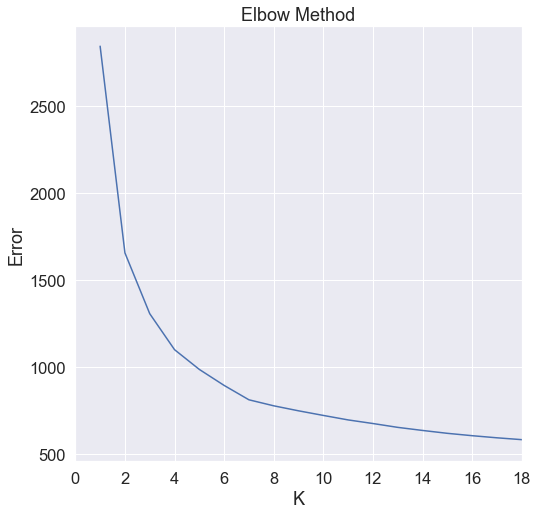

In [49]:
# Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
# the optimal k is determined by within-cluster sum of square (wss)(error)
#Plot the curve of wss according to the number of clusters k.
#The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
X = df[audio_cols]
Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Text(0.5, 0, 'K')

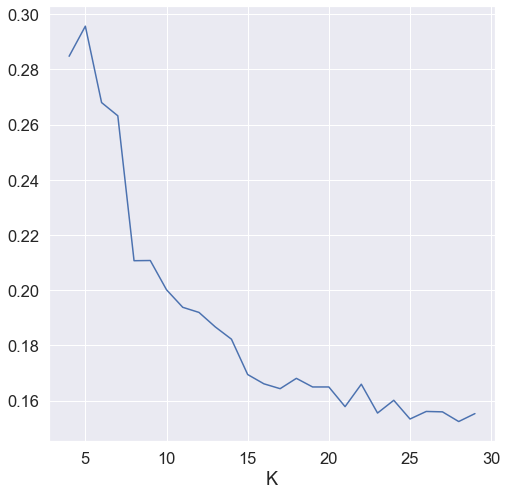

In [50]:
Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, random_state=1986).fit(X) for i in Ks]
s_scores = [silhouette_score(X,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.title('Silhouette Method')

In [52]:
print (s_scores)
print (Ks[2:len(Ks)])
kmeans = KMeans(n_clusters=7, random_state=1986).fit(X)
tmp = df.copy()
tmp['labels'] = kmeans.labels_

X

[0.2847233593106509, 0.29561569639369895, 0.2679457588867686, 0.2631560397617285, 0.2106652111218903, 0.21073378884859165, 0.2001364111327928, 0.19378418382116525, 0.19193198151241775, 0.18670182647988184, 0.18223345266740199, 0.16943346958346464, 0.16606778658057467, 0.16430676638667302, 0.16804969690418353, 0.1649287660607465, 0.1649292937857439, 0.15780261028071443, 0.16592499133629554, 0.15547972554230252, 0.16010307468143897, 0.15331894720936567, 0.1560567562559658, 0.1559133155317467, 0.1524063868647754, 0.15527811750959347]
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29]


,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,key
0,0.611437,0.408128,0.369702,0.259083,0.000000,0.105380,0.019388,0.419762,0.253843,0.060462
1,0.551405,0.359188,0.374661,0.275193,0.000000,0.033266,0.022491,0.424652,0.224354,0.344322
2,0.626968,0.341496,0.379827,0.279270,0.000001,0.055257,0.014436,0.243785,0.185184,0.413577
3,0.588035,0.350082,0.239140,0.185888,0.000000,0.058676,0.014792,0.378701,0.175041,0.512054
4,0.623107,0.468155,0.392038,0.278199,0.000000,0.163686,0.016167,0.306712,0.144151,0.139907
...,...,...,...,...,...,...,...,...,...,...
14855,0.615852,0.004566,0.420805,0.368138,0.000000,0.069520,0.107440,0.413179,0.330219,0.109388
14856,0.626676,0.180998,0.300842,0.357558,0.000000,0.075950,0.073977,0.395528,0.143516,0.409735
14857,0.664088,0.156012,0.262870,0.372934,0.000000,0.052841,0.098309,0.277303,0.400183,0.277428
14858,0.652451,0.006307,0.445940,0.420490,0.000017,0.069713,0.025727,0.309546,0.306515,0.057457


In [55]:
consine_similarity(tmp.copy(), genres, audio_cols)

{0: 'dance pop',
 1: 'classical',
 2: 'c-pop',
 3: 'none',
 4: 'c-pop',
 5: 'background music',
 6: 'dance pop'}

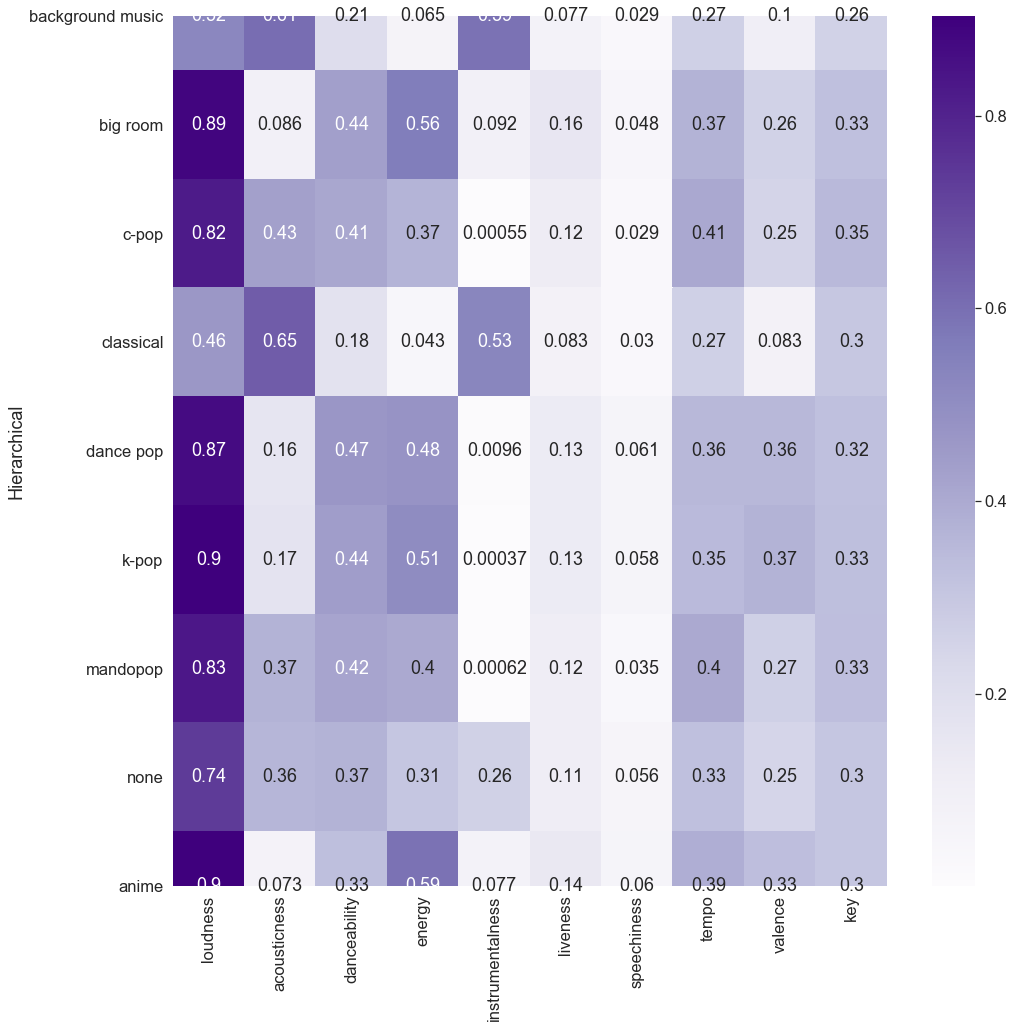

In [54]:
plot_correation(genres, audio_cols)

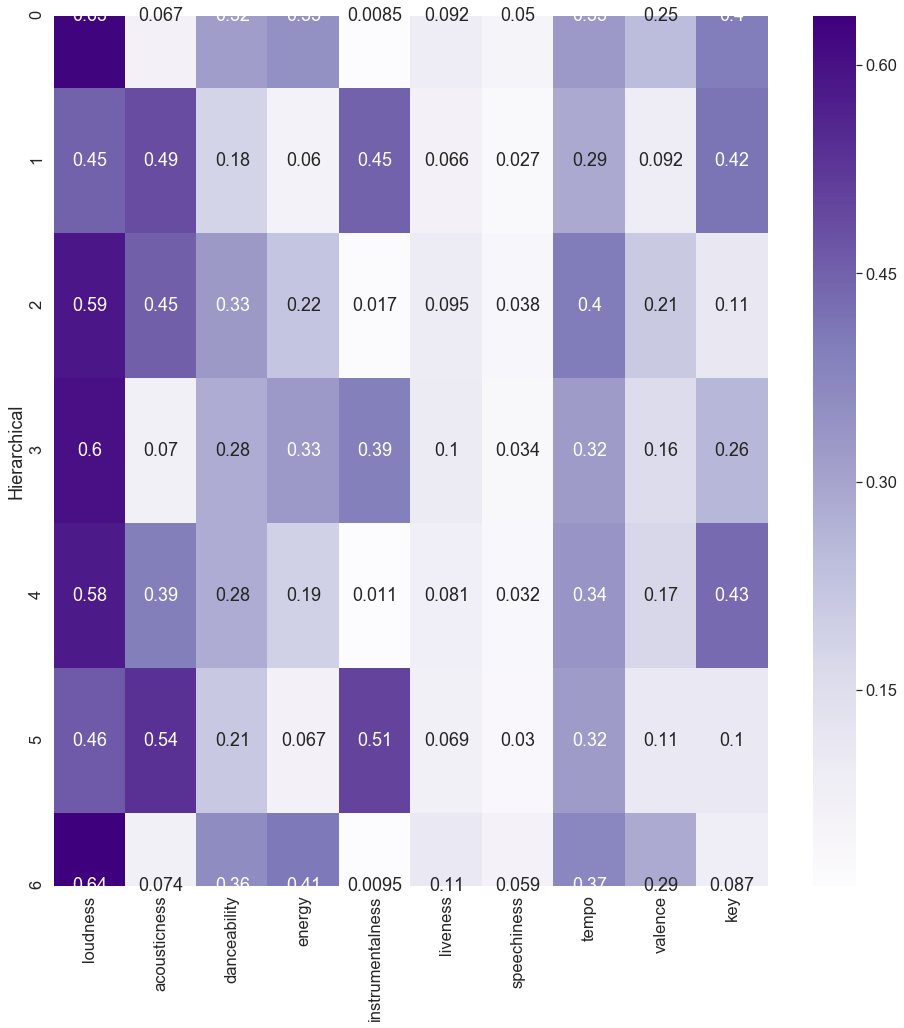

In [56]:
tmp = tmp.groupby('labels').agg('mean')
plot_correation(tmp, audio_cols)

In [57]:
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8, 8))
_X = df[audio_cols]
tsne = manifold.TSNE(n_components= 2, init='pca', random_state=0)
Y = tsne.fit_transform(_X)  
print ('finish')


finish


<Figure size 576x576 with 0 Axes>

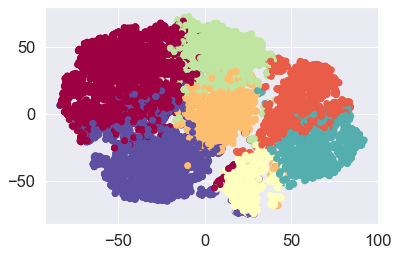

In [58]:
ax = fig.add_subplot(2, 1, 2)
color = kmeans.labels_
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.axis('tight')

plt.show()

finish


<Figure size 576x576 with 0 Axes>

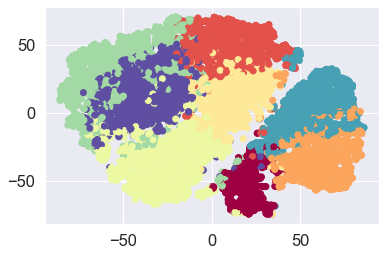

In [45]:
ax = fig.add_subplot(2, 1, 2)
color = kmeans.labels_
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.axis('tight')

plt.show()

Text(0.5, 0, 'K')

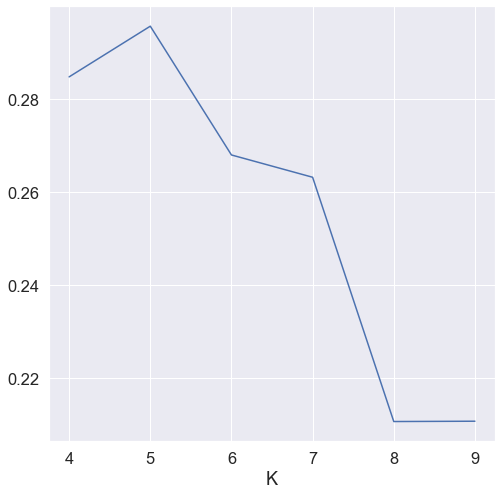

In [51]:
Ks = np.arange(2, 30)
plt.figure(figsize=(8,8))
plt.plot(Ks[2:8],s_scores[0:len(Ks[2:8])])
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.title('Silhouette Method')